In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


In [2]:
dataset_f = "nationality_dataset"
train_f = f'{dataset_f}/train'
test_f = f'{dataset_f}/test'

classes = ["Indian","American", "African", "Asian", "Others"]

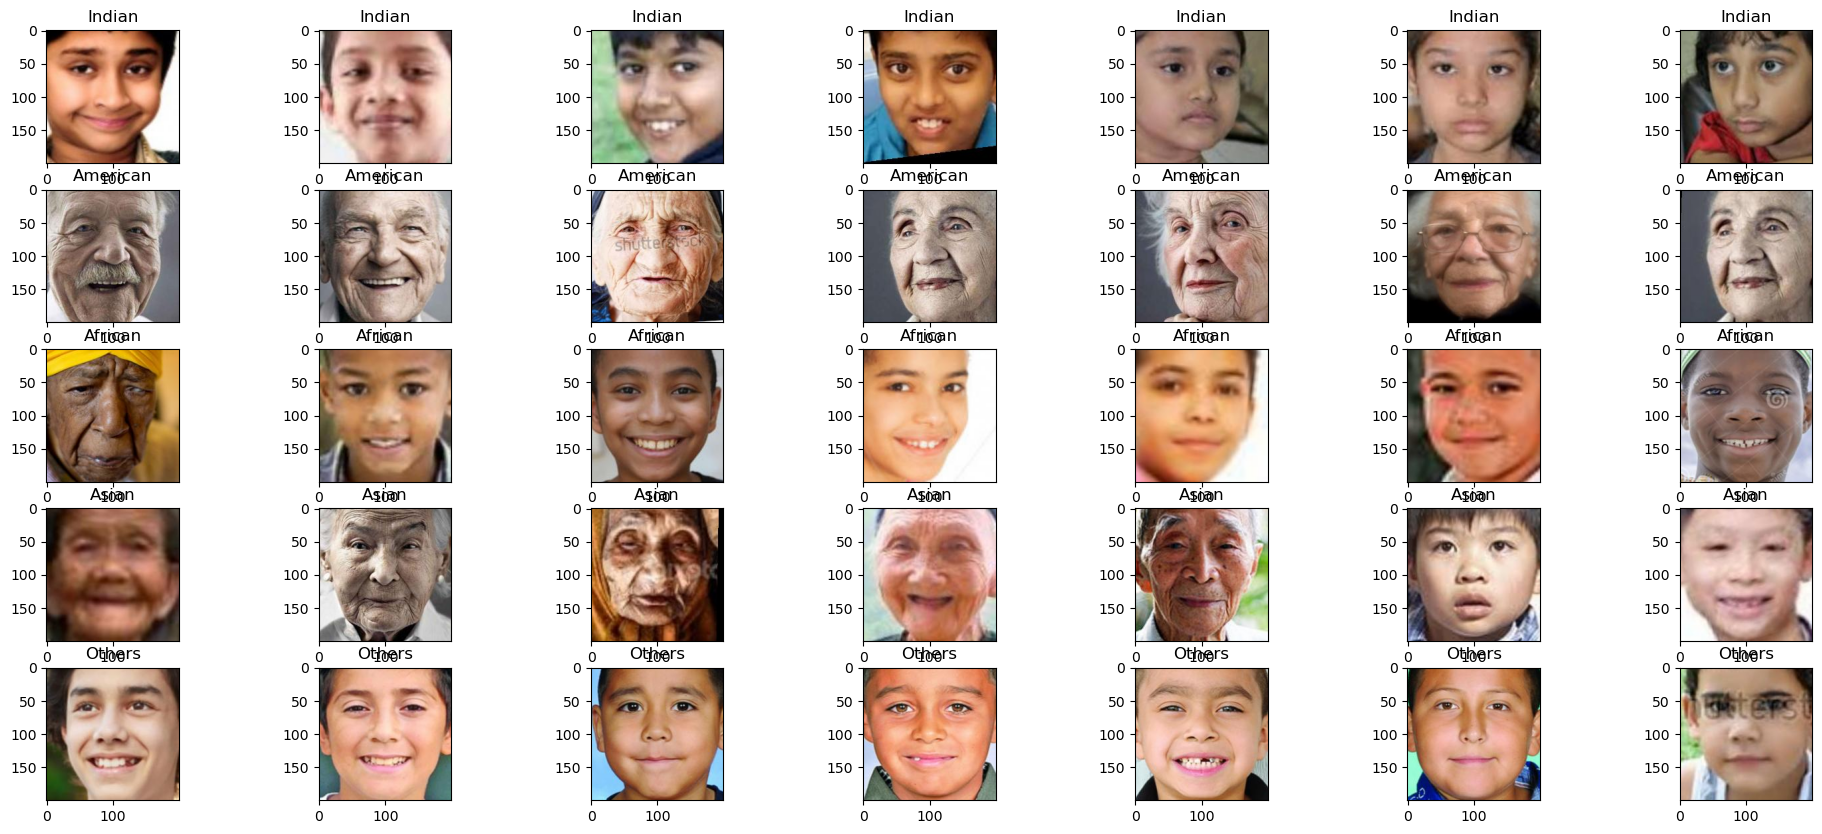

In [3]:
images_per_class = 7
fig, ax = plt.subplots(5, images_per_class, figsize=(24, 10))
for j in range(5):
    images = os.listdir(f'{train_f}/{classes[j]}')
    for i in range(images_per_class):
        image = plt.imread(f'{train_f}/{classes[j]}/{images[i]}')
        ax[j, i].set_title(classes[j])
        ax[j, i].imshow(image)

In [4]:
img_size = 200
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(train_f,
                                                    target_size = (img_size,img_size),
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory(test_f,
                                                    target_size = (img_size,img_size),
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 23705 images belonging to 5 classes.
Found 6634 images belonging to 5 classes.


In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [7]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(5,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [14]:
model = model_fer((200,200,3))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 200, 200, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 200, 200, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 100, 100, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      20,480,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,609,477 (78.62 MB)

 Trainable params: 20,608,517 (78.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
epochs = 8
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("nationality_detect.weights.h5", monitor ="val_accuracy", save_weights_only = True, mode = "max", verbose =1)
callbacks = (checkpoint,)

In [16]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs, 
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/8
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6002 - loss: 1.1473
Epoch 1: saving model to nationality_detect.weights.h5
370/370 ━━━━━━━━━━━━━━━━━━━━ 1581s 4s/step - accuracy: 0.6004 - loss: 1.1467 - val_accuracy: 0.7579 - val_loss: 0.6983
Epoch 2/8
  1/370 ━━━━━━━━━━━━━━━━━━━━ 23:36 4s/step - accuracy: 0.7500 - loss: 0.6681

C:\Users\LENOVO\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to nationality_detect.weights.h5
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7500 - loss: 0.6681 - val_accuracy: 0.7857 - val_loss: 0.6571
Epoch 3/8
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7780 - loss: 0.6389
Epoch 3: saving model to nationality_detect.weights.h5
370/370 ━━━━━━━━━━━━━━━━━━━━ 1508s 4s/step - accuracy: 0.7780 - loss: 0.6389 - val_accuracy: 0.6972 - val_loss: 0.8389
Epoch 4/8
  1/370 ━━━━━━━━━━━━━━━━━━━━ 23:30 4s/step - accuracy: 0.6562 - loss: 0.8151
Epoch 4: saving model to nationality_detect.weights.h5
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6562 - loss: 0.8151 - val_accuracy: 0.6667 - val_loss: 0.8433
Epoch 5/8
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8276 - loss: 0.5129
Epoch 5: saving model to nationality_detect.weights.h5
370/370 ━━━━━━━━━━━━━━━━━━━━ 1496s 4s/step - accuracy: 0.8275 - loss: 0.5129 - val_accuracy: 0.6217 - val_loss: 1.1095
Epoch 6/8
  1/370 ━━━━━━━━━━━━━━━━━━━━ 27:06 4s/step

In [17]:
model.evaluate(validation_generator)

104/104 ━━━━━━━━━━━━━━━━━━━━ 58s 557ms/step - accuracy: 0.8646 - loss: 0.4006


[0.40915462374687195, 0.8623756170272827]

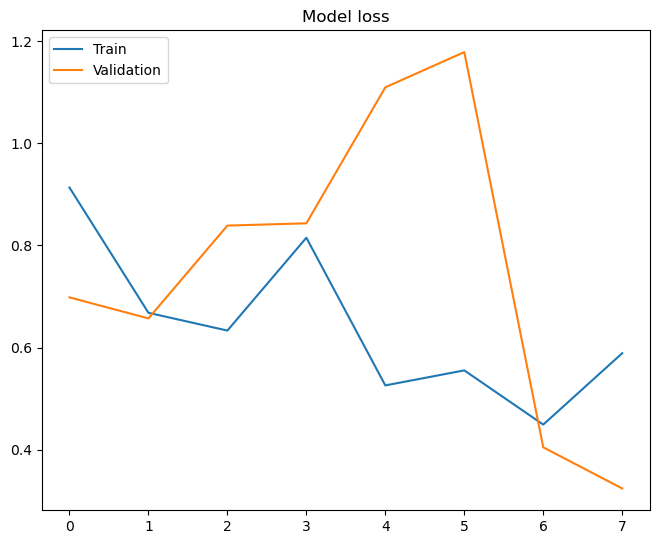

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.legend(["Train","Validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

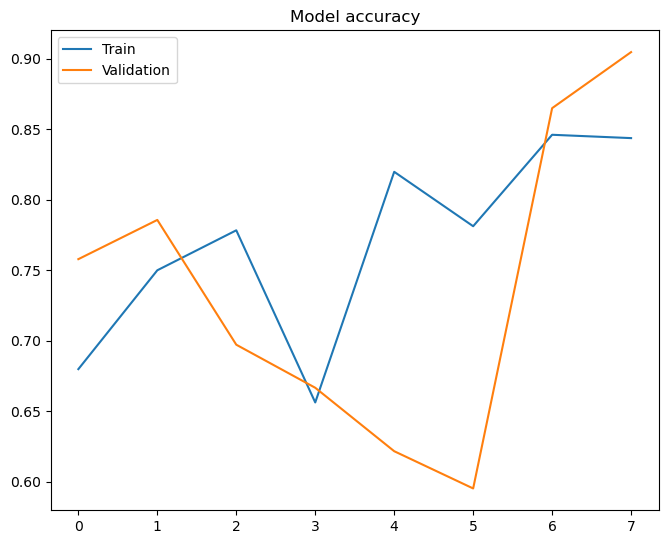

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.legend(["Train","Validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [21]:
model_json = model.to_json()
with open("model_nationality2.json","w") as json_file:
    json_file.write(model_json)